In [43]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,Dropout,MaxPooling2D,Flatten,Dense
from tensorflow.keras.callbacks import ModelCheckpoint
%matplotlib inline
# tf.keras.datasets.fashion_mnist.load_data()

In [2]:
from tensorflow.keras import layers

In [3]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

In [4]:
train_x.shape

(60000, 28, 28)

In [5]:
test_x.shape

(10000, 28, 28)

In [6]:
train_x = train_x.astype('float32')/255
test_x = test_x.astype('float32')/255

In [7]:
train_x.shape

(60000, 28, 28)

In [8]:
train_x[2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.08627451,
        0.4627451 , 0.09411765, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.1882353 , 0.34509805, 0.01960784,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.04705882, 0.39215687,
        0.83137256, 0.8039216 , 0.7254902 , 0.7019608 , 0.6784314 ,
        0.7294118 , 0.75686276, 0.8666667 , 0.5568628 , 0.33333334,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.33333334,
        0.29803923, 0.78039217, 0.88235295, 0.972549  , 1.        ,
        0.93333334, 0.8862

In [9]:
fashion_mnist_labels = ["T-shirt/top",  
                        "Trouser",      
                        "Pullover",      
                        "Dress",         
                        "Coat",         
                        "Sandal",       
                        "Shirt",        
                        "Sneaker",    
                        "Bag",           
                        "Ankle boot"]

Trouser


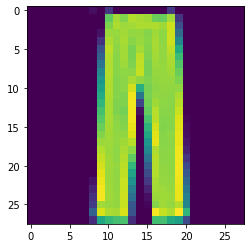

In [10]:
index = 143
print(fashion_mnist_labels[train_y[index]])
plt.imshow(train_x[index])

In [11]:
train_x,val_x = train_x[:55000],train_x[55000:]
train_y,val_y = train_y[:55000],train_y[55000:]

In [12]:
val_x.shape

(5000, 28, 28)

In [29]:
val_y.shape

(5000,)

In [30]:
train_x = train_x.reshape(len(train_x),28,28,1)
test_x =test_x.reshape(len(test_x),28,28,1)
val_x = val_x.reshape(len(val_x),28,28,1)

In [31]:
train_x.shape

(55000, 28, 28, 1)

In [33]:
train_y = to_categorical(train_y,10)
val_y = to_categorical(val_y,10)
test_y = to_categorical(test_y,10)

In [35]:
train_y.shape

(55000, 10)

In [38]:
model = Sequential([
    Conv2D(filters = 64,kernel_size=2,padding='same',activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(pool_size=2),
    Dropout(0.3),
    
    Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.3),
    
    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
])

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        16448     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

In [40]:
model.compile(
optimizer = 'adam',
loss = 'categorical_crossentropy',
metrics = ['accuracy'])

In [44]:
checkpointer = ModelCheckpoint(filepath = 'model.weights.best.hdf5',verbose = 1,save_best_only = True)


In [46]:
model.fit(train_x,train_y,batch_size = 64,epochs=10,
          validation_data=(val_x,val_y),
         callbacks = [checkpointer])

Epoch 1/10
860/860 [==============================] - 90s 102ms/step - loss: 0.7589 - accuracy: 0.7190 - val_loss: 0.3672 - val_accuracy: 0.8672

Epoch 00001: val_loss improved from inf to 0.36724, saving model to model.weights.best.hdf5
Epoch 2/10
860/860 [==============================] - 84s 98ms/step - loss: 0.4018 - accuracy: 0.8536 - val_loss: 0.3019 - val_accuracy: 0.8892

Epoch 00002: val_loss improved from 0.36724 to 0.30187, saving model to model.weights.best.hdf5
Epoch 3/10
860/860 [==============================] - 83s 97ms/step - loss: 0.3455 - accuracy: 0.8773 - val_loss: 0.2845 - val_accuracy: 0.8924

Epoch 00003: val_loss improved from 0.30187 to 0.28449, saving model to model.weights.best.hdf5
Epoch 4/10
860/860 [==============================] - 85s 99ms/step - loss: 0.3115 - accuracy: 0.8853 - val_loss: 0.2633 - val_accuracy: 0.9016

Epoch 00004: val_loss improved from 0.28449 to 0.26329, saving model to model.weights.best.hdf5
Epoch 5/10
860/860 [===================

In [47]:
model.load_weights('model.weights.best.hdf5')

In [49]:
score = model.evaluate(test_x,test_y,verbose=0)

In [50]:
print("test accuracy : ",score[1])

test accuracy :  0.9150000214576721


In [52]:
pred_y = model.predict(test_x)

In [58]:
test_y[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [59]:
np.argmax(pred_y[1])

2

In [61]:
model.save('MNIST_fashion_classifier_CNN')

INFO:tensorflow:Assets written to: MNIST_fashion_classifier_CNN\assets
